**Connect google drive**

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Tue Sep 22 08:21:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 balanced_data.csv
'Colab Notebooks'
 face.jpg
 geological_similarity
'Getting started.pdf'
 IMG_20180605_063830.jpg
 IMG_20180605_080407.jpg
 IMG_20180823_181538.JPG
 IMG_20180905_124956.jpg
 IMG_20180909_164653.jpg
 IMG_20180909_182006.jpg
 IMG_20180913_114809.jpg
 IMG_20180913_144912.jpg
 IMG_20180913_193312.jpg
 IMG_20180913_193313.jpg
 mnv.pdf
'M. SC '
'M. SC. Friends '
'My Drive'
'photos my.pdf'
'STUDY OF TIME MINIMIZING TRANSPORTATION PROBLEM AND ASSIGNMENT.gdoc'
 Test_img_file.zip
 Train_img.zip
 Yolo_mask_detection
 yolov3
 yolov3_80_objects.weights
 yolov3_plate_detection


**1) Clone, configure & compile Darknet**



In [ ]:
# Clone
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 14309 (delta 2), reused 5 (delta 2), pack-reused 14291
Receiving objects: 100% (14309/14309), 12.94 MiB | 19.99 MiB/s, done.
Resolving deltas: 100% (9753/9753), done.


In [ ]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# Compile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

**2) Configure yolov3.cfg file**

In [ ]:
# Make a copy of yolov3.cfg
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
# Change lines in yolov3.cfg file
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=21@' cfg/yolov3_training.cfg

**3) Create .names and .data files**

In [ ]:
!echo -e 'front_face\nback_head' > data/obj.names
!echo -e 'classes= 2\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data

**4) Save yolov3_training.cfg and obj.names files in Google drive**

In [ ]:
!cp cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3/obj.names
!cp data/obj.data /mydrive/yolov3/obj.data

**5) Create a folder and unzip image dataset**

In [ ]:
!mkdir data/obj
!unzip /mydrive/yolov3/images_.zip -d data/obj

Archive:  /mydrive/yolov3/images_.zip
  inflating: data/obj/a1.jpg         
  inflating: data/obj/a1.txt         
  inflating: data/obj/a10.jpg        
  inflating: data/obj/a10.txt        
  inflating: data/obj/a11.jpg        
  inflating: data/obj/a11.txt        
  inflating: data/obj/a12.jpeg       
  inflating: data/obj/a12.jpg        
  inflating: data/obj/a12.txt        
  inflating: data/obj/a13.jpg        
  inflating: data/obj/a13.txt        
  inflating: data/obj/a14.jpg        
  inflating: data/obj/a14.txt        
  inflating: data/obj/a15.jpg        
  inflating: data/obj/a15.txt        
  inflating: data/obj/a16.jpg        
  inflating: data/obj/a16.txt        
  inflating: data/obj/a17.jpg        
  inflating: data/obj/a17.txt        
  inflating: data/obj/a18.jpg        
  inflating: data/obj/a18.txt        
  inflating: data/obj/a19.jpg        
  inflating: data/obj/a19.txt        
  inflating: data/obj/a2.jpg         
  inflating: data/obj/a2.txt         
  inflating:

**6) Create train.txt file**

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")

with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
images_list

['data/obj/rr24.jpg',
 'data/obj/peoples.jpg',
 'data/obj/crb5.jpg',
 'data/obj/a31.jpg',
 'data/obj/crowd3.jpg',
 'data/obj/cr60.jpg',
 'data/obj/rr20.jpg',
 'data/obj/a67.jpg',
 'data/obj/a10.jpg',
 'data/obj/a69.jpg',
 'data/obj/cr65.jpg',
 'data/obj/br22.jpg',
 'data/obj/ac4.jpg',
 'data/obj/rr3.jpg',
 'data/obj/a23.jpg',
 'data/obj/cr28.jpg',
 'data/obj/a45.jpg',
 'data/obj/rr30.jpg',
 'data/obj/cr16.jpg',
 'data/obj/a49.jpg',
 'data/obj/rr16.jpg',
 'data/obj/a18.jpg',
 'data/obj/crb7.jpg',
 'data/obj/a68.jpg',
 'data/obj/a37.jpg',
 'data/obj/crb9.jpg',
 'data/obj/cr62.jpg',
 'data/obj/a34.jpg',
 'data/obj/cr79.jpg',
 'data/obj/rr13.jpg',
 'data/obj/crowd2.jpg',
 'data/obj/cr37.jpg',
 'data/obj/rr2.jpg',
 'data/obj/crb15.jpg',
 'data/obj/crowd5.jpg',
 'data/obj/a43.jpg',
 'data/obj/br14.jpg',
 'data/obj/cr30.jpg',
 'data/obj/br8.jpg',
 'data/obj/cr42.jpg',
 'data/obj/rr29.jpg',
 'data/obj/rr27.jpg',
 'data/obj/a17.jpg',
 'data/obj/a63.jpg',
 'data/obj/a26.jpg',
 'data/obj/cr53.jpg

In [ ]:
len(images_list)

252

**7) Download pre-trained weights for the convolutional layers file**

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-09-20 17:10:05--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   459KB/s    in 5m 43s  

2020-09-20 17:15:49 (463 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**8) Start training**

In [ ]:
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show 
# Uncomment below and comment above to re-start your training from last saved weights
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights -dont_show


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000004, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.821203, GIOU: 0.814640), Class: 0.999883, Obj: 0.754370, No Obj: 0.004049, .5R: 1.000000, .75R: 0.812500, count: 16, class_loss = 0.803934, iou_loss = 0.423857, total_loss = 1.227791 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.751128, GIOU: 0.734370), Class: 0.997668, Obj: 0.657178, No Obj: 0.003317, .5R: 0.949153, .75R: 0.593220, count: 59, class_loss = 4.675881, iou_loss = 3.230609, total_loss = 7.906490 
 total_bbox = 292861, rewritten_bbox = 0.249606 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Ob

In [ ]:
#  training anather code
#!./darknet detector train "/content/darknet/Mask/obj.data" "/content/darknet/Mask/yolov3_mask.cfg" "/content/darknet/weights/darknet53.conv.74" -dont_show
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights -dont_show

1 ] x_value: 26 y_value: 113 width : 71 height : 61 class :  f
2 ] x_value: 142 y_value: 175 width : 94 height : 64 class :  f
3 ] x_value: 379 y_value: 170 width : 71 height : 60 class :  f
5 ] x_value: 574 y_value: 178 width : 76 height : 63 class :  f
7 ] x_value: 787 y_value: 210 width : 87 height : 60 class :  f
9 ] x_value: 73 y_value: 268 width : 107 height : 84 class :  f
10 ] x_value: 328 y_value: 267 width : 85 height : 66 class :  f
11 ] x_value: 228 y_value: 293 width : 88 height : 85 class :  f
12 ] x_value: 449 y_value: 303 width : 80 height : 79 class :  f
13 ] x_value: 640 y_value: 293 width : 106 height : 80 class :  f
14 ] x_value: 804 y_value: 407 width : 87 height : 60 class :  f
15 ] x_value: 299 y_value: 482 width : 83 height : 94 class :  f
16 ] x_value: 662 y_value: 494 width : 93 height : 78 class :  f
17 ] x_value: 450 y_value: 533 width : 86 height : 90 class :  f
18 ] x_value: 423 y_value: 26 width : 46 height : 26 class :  f
19 ] x_value: 469 y_value: 44 wi

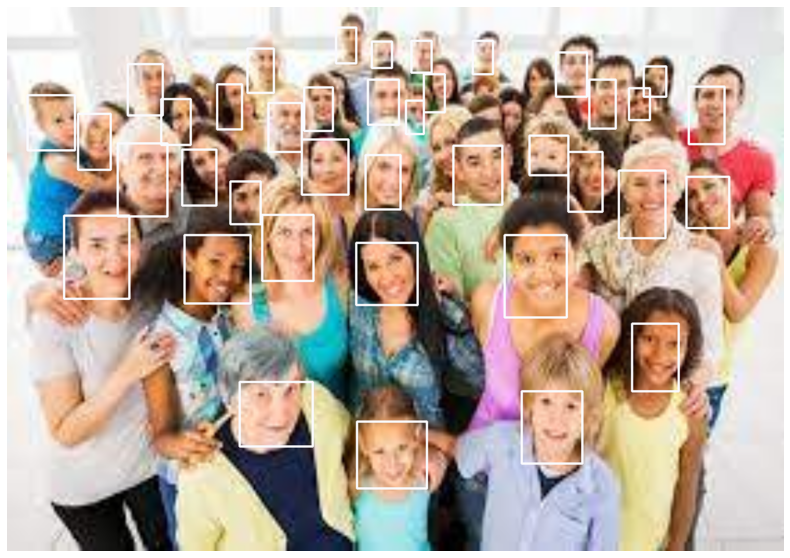

In [20]:
# Test last weight file  and plot image 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
weight_path='/content/gdrive/My Drive/yolov3/yolov3_training_3000.weights' #weight file pat
cfg_path='/content/gdrive/My Drive/yolov3/yolov3_testing.cfg' # Configuration file path
image_file_path='/content/gdrive/My Drive/yolov3/test_face/cr12.jpg'  # image file path
threshold=0.5
classes = ['f','b']
# Load Yol
net = cv2.dnn.readNet(weight_path,cfg_path)
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = (0,0,255)
# Loading image
img=cv2.imread(image_file_path)
img=cv2.resize(img,(1000,700))
#img = cv2.resize(img, None, fx=0.4, fy=0.4)

height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > threshold:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            h = int(detection[2] * width)
            w= int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i],2))
        print(i,']', 'x_value:',x, 'y_value:',y ,'width :',w ,'height :',h , 'class : ',label)
        #cv2.rectangle(img, (x, y), (x + w, y + h), colors, 2)
        #cv2.putText(img, label, (x, y + 30), font, 1, colors, 2)
        if label==classes[1]:
          cv2.rectangle(img,(x,y), (x+h,y+w), (0,0,255), 2)
          #cv2.putText(img,str(label), (x,y-5), font, 1, (200,250,255), 2)
          #cv2.putText(img,str(float(confidence)*100)+'%', (x,y-30), font, 1, (0,0,255), 2)
        if label==classes[0]:
          cv2.rectangle(img, (x,y), (x+h,y+w), (255,250,250), 2)
          #cv2.putText(img,str(label), (x,y-5), font, 1, (255,0,0), 2)
          #cv2.putText(img,str(float(confidence)*100)+'%', (x,y-30), font, 1, (255,0,0), 2)
        #if label==classes[1]:
         # cv2.rectangle(img, (x,y), (x+h,y+w), (0,255,0), 1)
          #cv2.putText(img,str(label), (x,y-5), font, 1, (0,255,0), 2)
          #cv2.putText(img,str(float(confidence)*100)+'%', (x,y-30), font, 1, (0,255,0), 2)
height, width = img.shape[:2]
resized_image = cv2.resize(img,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
v#https://www.codementor.io/@edugan28/face-mask-detection-using-yolo-v3-18tpxfjrso

In [1]:
import os

In [4]:
os.getcwd()+'\\weight'

'C:\\Users\\Vishal\\AIS_vision100.ai\\crowd_detection\\weight'